<a href="https://colab.research.google.com/github/mariacmartins/shepy/blob/main/Aula_5_An%C3%A1lise_de_dados_Spotify_shePY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise e visualização de dados - Top 50 músicas do Spotify 2019
<img src="https://www.scdn.co/i/_global/open-graph-default.png" width="420" height="200">

Dados obtidos em: https://www.kaggle.com/leonardopena/top50spotify2019

### O que é um DataFrame? 
Um dataframe é uma estrutura de dados bidimensional, onde os dados são alinhados de forma tabular em linhas e colunas.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('top50.csv', encoding='ISO-8859-1')
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


### Alterando o Dataframe para facilitar as análises

In [3]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [4]:
df.rename(columns={'Track.Name':'Track',
                   'Artist.Name':'Artist',
                   'Genre':'Genre',
                   'Beats.Per.Minute':'Bpm',
                   'Energy':'Energy',
                   'Danceability':'Danceability',
                   'Loudness..dB..':'Loudness',
                   'Liveness':'Liveness',
                   'Valence.':'Valence',
                   'Length.':'Length',
                   'Acousticness..':'Acousticness',
                   'Speechiness.':'Speechiness',
                   'Popularity':'Popularity'}, inplace=True)

In [5]:
df.head() #o comando head permite visualizar as 5 primeiras linhas

,Track,Artist,Genre,Bpm,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


### Análise exploratória dos dados

In [6]:
df.shape # O df possui 50 linhas e 13 colunas

(50, 13)

In [7]:
df.describe()

,Bpm,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Track         50 non-null     object
 1   Artist        50 non-null     object
 2   Genre         50 non-null     object
 3   Bpm           50 non-null     int64 
 4   Energy        50 non-null     int64 
 5   Danceability  50 non-null     int64 
 6   Loudness      50 non-null     int64 
 7   Liveness      50 non-null     int64 
 8   Valence       50 non-null     int64 
 9   Length        50 non-null     int64 
 10  Acousticness  50 non-null     int64 
 11  Speechiness   50 non-null     int64 
 12  Popularity    50 non-null     int64 
dtypes: int64(10), object(3)
memory usage: 5.2+ KB


**Analisando dados de gêneros musicais**

In [9]:
df['Genre'].unique()

array(['canadian pop', 'reggaeton flow', 'dance pop', 'pop', 'dfw rap',
       'trap music', 'country rap', 'electropop', 'reggaeton',
       'panamanian pop', 'canadian hip hop', 'latin', 'escape room',
       'pop house', 'australian pop', 'edm', 'atl hip hop', 'big room',
       'boy band', 'r&b en espanol', 'brostep'], dtype=object)

In [10]:
df['Genre'].nunique() #21 valores de gênero musical

21

In [11]:
df['Genre'].value_counts()

dance pop           8
pop                 7
latin               5
edm                 3
canadian hip hop    3
reggaeton flow      2
dfw rap             2
brostep             2
reggaeton           2
canadian pop        2
electropop          2
country rap         2
panamanian pop      2
atl hip hop         1
r&b en espanol      1
big room            1
pop house           1
australian pop      1
escape room         1
trap music          1
boy band            1
Name: Genre, dtype: int64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Gêneros musicais')

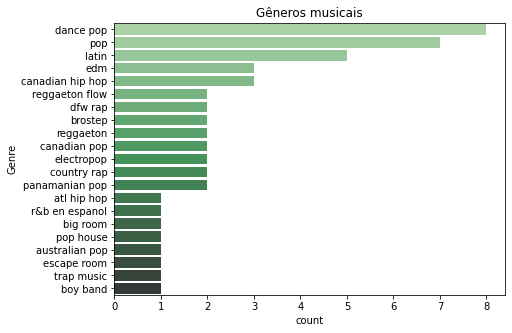

In [13]:
plt.figure(figsize=(7, 5)) #ajustando o tamanho do gráfico

sns.countplot(y='Genre', 
    data=df, 
    palette='Greens_d', 
    order=df['Genre'].value_counts().index).set_title("Gêneros musicais")

**Analisando dados de Batidas por Minuto (Bpm)**

In [14]:
print(df['Bpm'].min(), df['Bpm'].max()) #valores mínimo e máximo de bpm

85 190


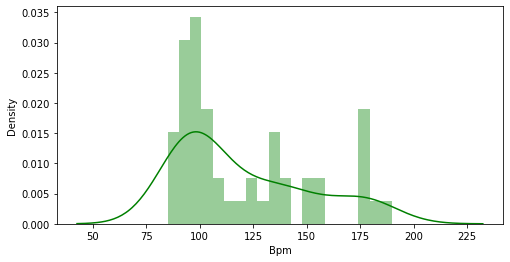

In [15]:
plt.figure(figsize=(8,4))
sns.distplot(df['Bpm'], bins=20, color='green')

Filtrando os dados:

In [16]:
df.query('Bpm == 190')

,Track,Artist,Genre,Bpm,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85


In [17]:
df.query('Bpm == 85')

,Track,Artist,Genre,Bpm,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
30,Takeaway,The Chainsmokers,edm,85,51,29,-8,10,36,210,12,4,84
41,You Need To Calm Down,Taylor Swift,dance pop,85,68,77,-6,7,73,171,1,5,90


In [18]:
df.query('Bpm >= 170 and Energy >= 60')

,Track,Artist,Genre,Bpm,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
10,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
13,Otro Trago - Remix,Sech,panamanian pop,176,79,73,-2,6,76,288,7,20,87
16,LA CANCIÓN,J Balvin,latin,176,65,75,-6,11,43,243,15,32,90
36,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91
46,Te Robaré,Nicky Jam,latin,176,75,67,-4,8,80,202,24,6,88


**Analisando dados de popularidade**

In [19]:
df.query('Popularity == 95') #música mais popular

,Track,Artist,Genre,Bpm,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


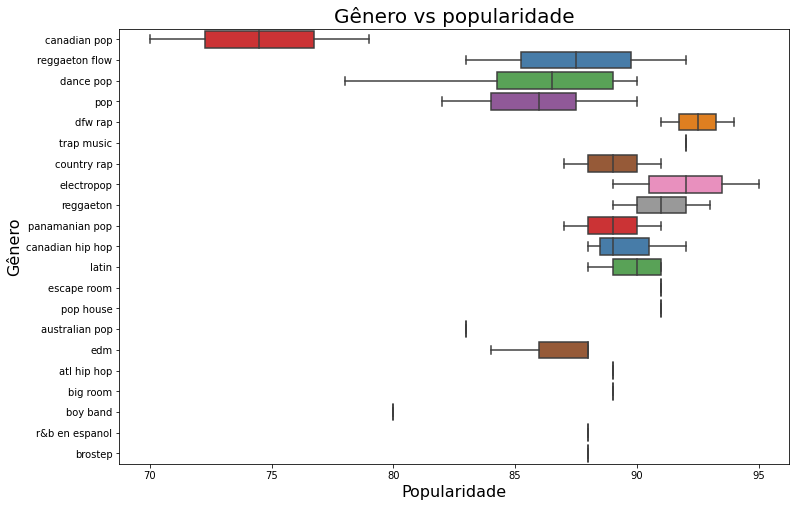

In [20]:
plt.figure(figsize=(12,8))

sns.boxplot(x='Popularity', y='Genre', data=df, palette = 'Set1')

plt.xlabel('Popularidade', fontsize=16)
plt.ylabel('Gênero', fontsize=16)
plt.yticks(rotation='0')
plt.title("Gênero vs popularidade", fontsize=20)
plt.show()

In [21]:
#gerando um dataframe apenas com músicas com popularidade maior ou igual a 90
most_popular = df.query('Popularity >= 90') 
len(most_popular)

16

Text(0.5, 1.0, 'Gêneros musicais das 16 músicas mais populares')

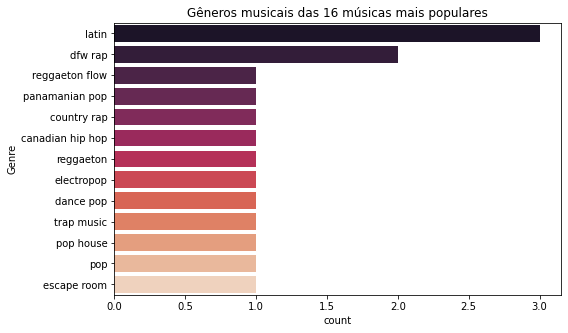

In [22]:
plt.figure(figsize=(8, 5))

sns.countplot(y='Genre', 
    data=most_popular, 
    palette='rocket', 
    order=most_popular['Genre'].value_counts().index).set_title("Gêneros musicais das 16 músicas mais populares")

**Correlação**

Um coeficiente de correlação é uma medida numérica de algum tipo de correlação, significando uma relação estatística entre duas variáveis. O coeficiente de correlação assume valores na faixa de -1 a +1, em que +1 indica forte correlação positiva, -1 forte correlação negativa e 0 uma situação onde não há correlação entre as variáveis.

In [23]:
df.head(3)

,Track,Artist,Genre,Bpm,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85


In [24]:
#Analisando correlação apenas das colunas de dados numéricos
corr = df.loc[:, 'Bpm': 'Popularity'].corr()
corr

,Bpm,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
Bpm,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139288,-0.031450,0.557052,0.196097
Energy,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.224677,-0.339892,-0.089860,-0.080295
Danceability,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,-0.000185,-0.098165,-0.103472,-0.071413
Loudness,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219219,-0.138300,-0.272213,-0.043085
Liveness,-0.167286,0.162768,-0.149636,0.258652,1.000000,0.016123,0.131782,0.021328,-0.125286,0.092564
Valence,-0.011586,0.438820,0.172829,0.237614,0.016123,1.000000,-0.017782,-0.052323,-0.053242,-0.317752
Length,-0.139288,0.224677,-0.000185,0.219219,0.131782,-0.017782,1.000000,-0.076293,0.046755,-0.087639
Acousticness,-0.031450,-0.339892,-0.098165,-0.138300,0.021328,-0.052323,-0.076293,1.000000,0.008293,-0.034684
Speechiness,0.557052,-0.089860,-0.103472,-0.272213,-0.125286,-0.053242,0.046755,0.008293,1.000000,0.238553
Popularity,0.196097,-0.080295,-0.071413,-0.043085,0.092564,-0.317752,-0.087639,-0.034684,0.238553,1.000000


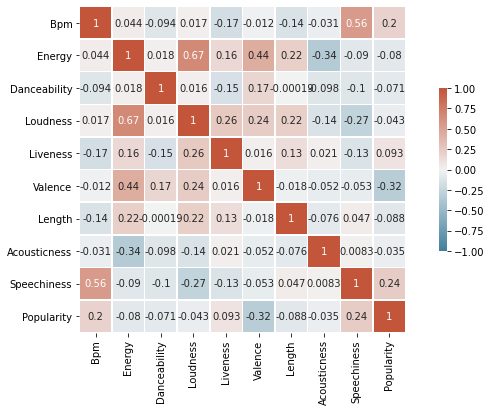

In [25]:
plt.figure(figsize=(12, 6))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, center=0, vmin=-1, vmax=1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Nuvem de palavras:**

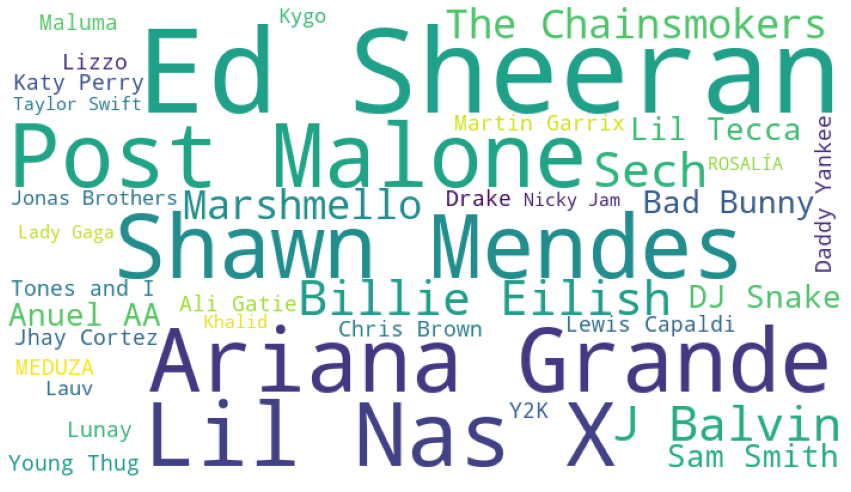

In [26]:
from wordcloud import WordCloud
from collections import Counter
allSongs = [trackname for trackname in df['Artist']]
wc_dict = Counter(allSongs)

wordcloud = WordCloud(width=700, height=400, background_color = 'white').generate_from_frequencies(wc_dict)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off');

Para saber mais: 
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://seaborn.pydata.org/generated/seaborn.countplot.html
- https://matplotlib.org/